## Sphericity (ranging from 0 to 1)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
sns.set()

In [23]:
df = pd.read_csv('C:/Users/hamro/Desktop/preprocessed_table.csv')

In [24]:
df.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,VoxelFaceArea,BorderVoxelCount,GreyMass (µm^3)
0,91.7529,-1249.26,-1243.58,-1685.28,0.545994,0.731435,0.620706,0.000245,0,91.7529
1,33.2852,-1241.94,-1257.46,-1686.12,0.946436,0.566783,0.094506,0.000175,0,33.2852
2,26.8576,-1246.98,-1235.86,-1648.17,0.862477,0.343091,0.400835,0.000195,0,26.8576
3,20.5755,-1249.24,-1250.28,-1680.69,0.844642,0.736602,0.210912,0.000094,0,20.5755
4,17.9376,-1242.87,-1249.47,-1647.25,0.710594,0.471159,0.614242,0.000071,0,17.9376


### for calculating sphericity the below formula was used
### where Vp - is the volume of particle and Ap - is the area of particle
### viz: https://sciencing.com/calculate-sphericity-5143572.html

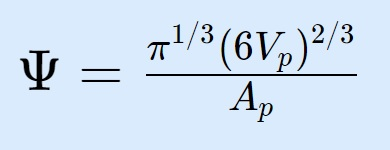

In [25]:
def sphericity(volume, surface_area):
    """
    function for calculation sphericity based on the volume and the area of particles
    """
    return ((math.pi**(1./3.))*((6*volume)**(2./3.)))/surface_area

### changing unit for voxel area

In [26]:
df['VoxelFaceAreaMM'] = df['VoxelFaceArea']*1000000

In [27]:
df['Sphericity'] = df.apply(lambda x: sphericity(x['Volume3d (mm^3) '], x['VoxelFaceAreaMM']), axis=1)

In [28]:
df.drop(["VoxelFaceArea"], axis=1, inplace=True)

In [30]:
df.head()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,BorderVoxelCount,GreyMass (µm^3),VoxelFaceAreaMM,Sphericity
0,91.7529,-1249.26,-1243.58,-1685.28,0.545994,0.731435,0.620706,0,91.7529,244.7360,0.401975
1,33.2852,-1241.94,-1257.46,-1686.12,0.946436,0.566783,0.094506,0,33.2852,175.0780,0.285816
2,26.8576,-1246.98,-1235.86,-1648.17,0.862477,0.343091,0.400835,0,26.8576,194.9460,0.222475
3,20.5755,-1249.24,-1250.28,-1680.69,0.844642,0.736602,0.210912,0,20.5755,94.2789,0.385156
4,17.9376,-1242.87,-1249.47,-1647.25,0.710594,0.471159,0.614242,0,17.9376,71.3098,0.464705


### sphericity particles over 2mm^3
### for this category of particles sphericity ranges from 0.22 to 0.55

In [32]:
sphericity_over_2 = df[df['Volume3d (mm^3) '] > 2]

In [61]:
sphericity_over_2.describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,BorderVoxelCount,GreyMass (µm^3),VoxelFaceAreaMM,Sphericity
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.000000,69.000000,69.000000
mean,7.194427,-1246.532464,-1247.985072,-1673.264203,0.749591,0.522337,0.490613,0.0,7.194427,43.186864,0.399711
std,11.879673,5.010710,8.228589,25.167699,0.138979,0.190592,0.223466,0.0,11.879673,40.252915,0.082241
min,2.057330,-1260.040000,-1263.090000,-1720.930000,0.373645,0.141648,0.094506,0.0,2.057330,15.814000,0.222475
25%,2.649340,-1249.400000,-1254.750000,-1692.350000,0.659225,0.399644,0.304423,0.0,2.649340,22.947400,0.334487
50%,3.763380,-1246.280000,-1247.770000,-1669.500000,0.762504,0.492984,0.491434,0.0,3.763380,29.387900,0.406799
75%,7.212370,-1242.330000,-1242.440000,-1655.430000,0.860182,0.672624,0.626743,0.0,7.212370,44.775600,0.464705
max,91.752900,-1236.340000,-1229.200000,-1619.440000,0.966510,0.917335,0.959761,0.0,91.752900,244.736000,0.557364


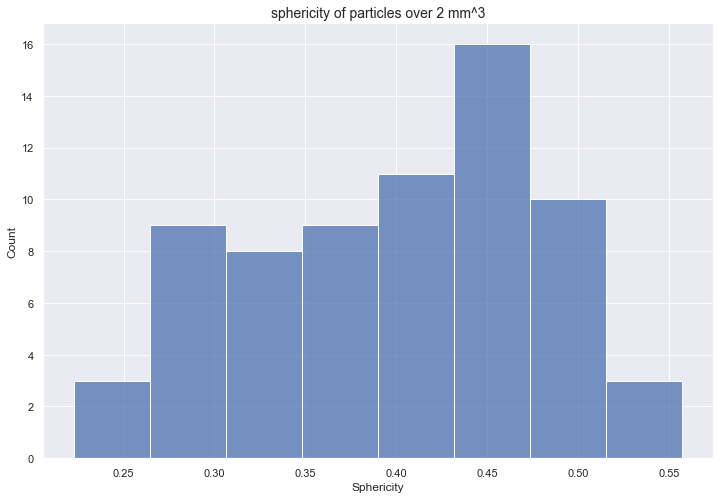

In [37]:
fig = plt.figure(figsize=(12,8))
sns.histplot(sphericity_over_2['Sphericity'])
plt.title("sphericity of particles over 2 mm^3", {'size':14})
plt.show()

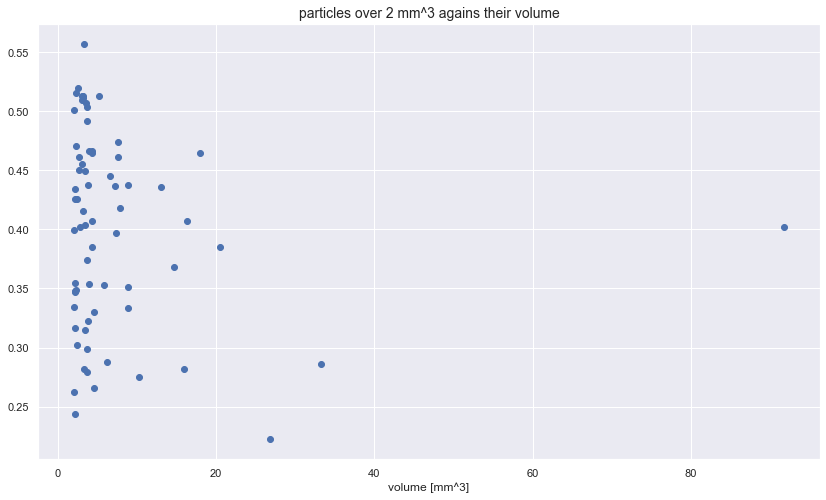

In [60]:
fig = plt.figure(figsize=(14,8))
plt.scatter(sphericity_over_2['Volume3d (mm^3) '], sphericity_over_2['Sphericity'])
plt.title("particles over 2 mm^3 agains their volume", {'size':14})
plt.xlabel("volume [mm^3]" ,{'size':12})
plt.show()

### as we can see below there is not strong correlation between sphericity and the coordinates of the particals

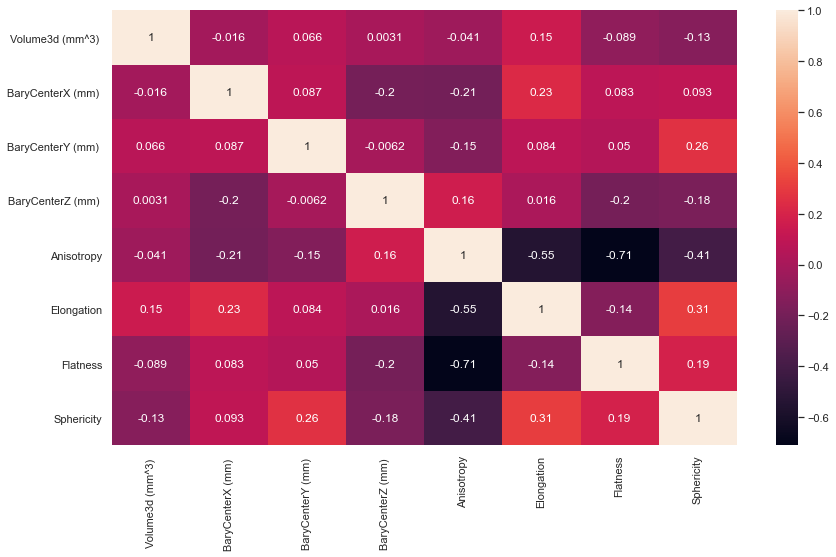

In [66]:
fig = plt.figure(figsize=(14,8))
corrMatrix = sphericity_over_2[['Volume3d (mm^3) ', 'BaryCenterX (mm) ', 'BaryCenterY (mm) ',
       'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'Sphericity']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### sphericity of particles under 2 mm^3

In [39]:
sphericity_under_2 = df[df['Volume3d (mm^3) '] <= 2]

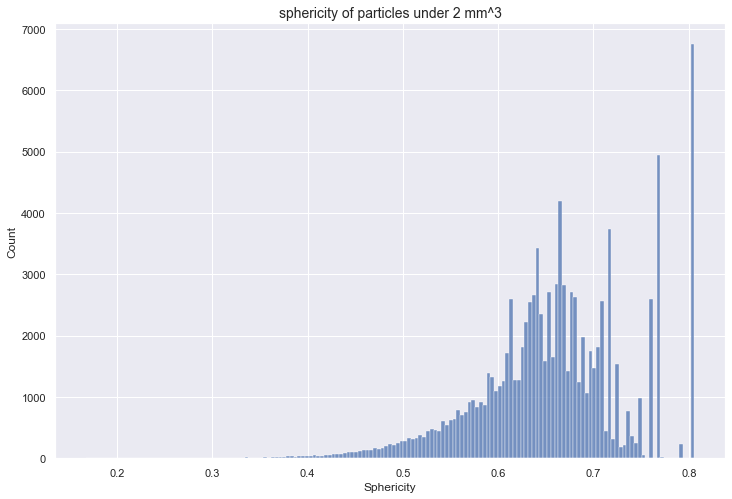

In [42]:
fig = plt.figure(figsize=(12,8))
sns.histplot(sphericity_under_2['Sphericity'])
plt.title("sphericity of particles under 2 mm^3", {'size':14})
plt.show()

### all particles with sphericity over 0.7 do not exceed the volume of 0.002 mm^3

In [74]:
sphericity_under_2[sphericity_under_2['Sphericity'] > 0.7].describe()

,Volume3d (mm^3),BaryCenterX (mm),BaryCenterY (mm),BaryCenterZ (mm),Anisotropy,Elongation,Flatness,BorderVoxelCount,GreyMass (µm^3),VoxelFaceAreaMM,Sphericity
count,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000,29083.000000
mean,0.000058,-1246.562165,-1246.915932,-1671.792036,0.519784,0.183416,-0.069961,0.000309,0.000058,0.008343,0.751456
std,0.000102,4.652748,7.791761,25.387973,0.707174,0.608395,0.731451,0.052774,0.000102,0.008405,0.037515
min,0.000007,-1261.710000,-1269.400000,-1731.770000,-1.000000,-1.000000,-1.000000,0.000000,0.000007,0.002151,0.700031
25%,0.000014,-1249.775000,-1252.580000,-1690.250000,0.500179,0.000000,-1.000000,0.000000,0.000014,0.003584,0.718513
50%,0.000027,-1246.520000,-1246.920000,-1671.560000,0.824093,0.290344,0.061457,0.000000,0.000027,0.005735,0.759395
75%,0.000068,-1243.190000,-1241.360000,-1653.450000,1.000000,0.612573,0.556723,0.000000,0.000068,0.010753,0.767674
max,0.002233,-1233.630000,-1225.980000,-1617.670000,1.000000,0.999977,1.000000,9.000000,0.002233,0.117572,0.805997


### practically no correlation between sphericity and particle coordinates

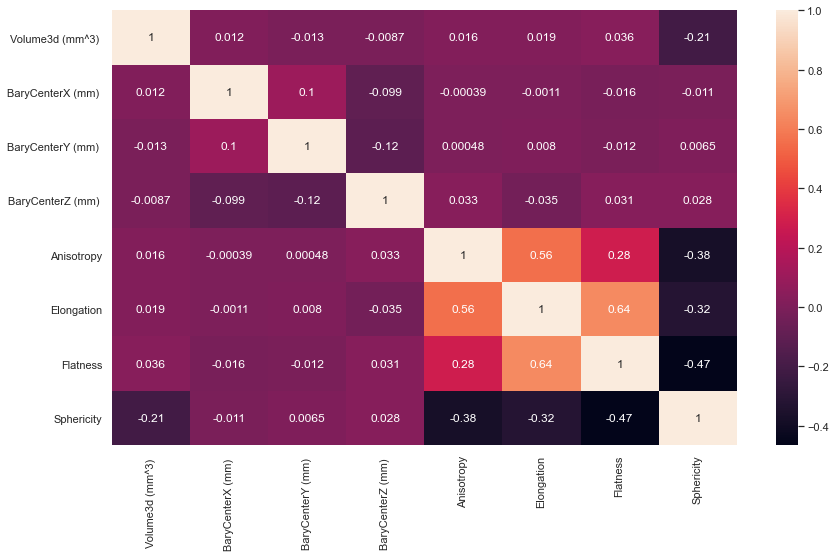

In [67]:
fig = plt.figure(figsize=(14,8))
corrMatrix = sphericity_under_2[['Volume3d (mm^3) ', 'BaryCenterX (mm) ', 'BaryCenterY (mm) ',
       'BaryCenterZ (mm) ', 'Anisotropy', 'Elongation', 'Flatness',
       'Sphericity']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()